# Linear Regression Exercise

Let's use a dataset relatively clean

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from MLBookCamp.DataRegister import DataRegister
import seaborn as sns
# Data register helper
dr = DataRegister("../../datasets")
raw_array = np.loadtxt(dr.get_path_from_key("udacity_lasso"), delimiter=',')
print(f'shape:{raw_array.shape}')
# Check the dataframe structure
raw_df = pd.DataFrame(raw_array, columns=['Col1','Col2','Col3','Col4','Col5','Col6','Target'])

raw_df.head()

shape:(100, 7)


,Col1,Col2,Col3,Col4,Col5,Col6,Target
0,1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590,12.31798
1,-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640,23.67628
2,5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626,-1.53459
3,0.39034,-3.06861,-5.63488,6.43941,0.39256,-0.07084,-24.68670
4,5.84727,-0.15922,11.41246,7.52165,1.69886,0.29022,17.54122


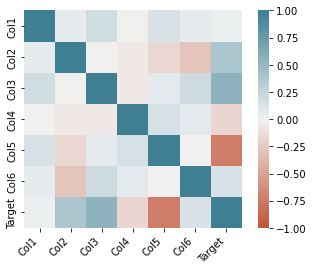

In [2]:
import Utilities as util
util.plot_corr_matrix(raw_df)

array([[<AxesSubplot:xlabel='Col1', ylabel='Col1'>,
        <AxesSubplot:xlabel='Col2', ylabel='Col1'>,
        <AxesSubplot:xlabel='Col3', ylabel='Col1'>,
        <AxesSubplot:xlabel='Col4', ylabel='Col1'>,
        <AxesSubplot:xlabel='Col5', ylabel='Col1'>,
        <AxesSubplot:xlabel='Col6', ylabel='Col1'>,
        <AxesSubplot:xlabel='Target', ylabel='Col1'>],
       [<AxesSubplot:xlabel='Col1', ylabel='Col2'>,
        <AxesSubplot:xlabel='Col2', ylabel='Col2'>,
        <AxesSubplot:xlabel='Col3', ylabel='Col2'>,
        <AxesSubplot:xlabel='Col4', ylabel='Col2'>,
        <AxesSubplot:xlabel='Col5', ylabel='Col2'>,
        <AxesSubplot:xlabel='Col6', ylabel='Col2'>,
        <AxesSubplot:xlabel='Target', ylabel='Col2'>],
       [<AxesSubplot:xlabel='Col1', ylabel='Col3'>,
        <AxesSubplot:xlabel='Col2', ylabel='Col3'>,
        <AxesSubplot:xlabel='Col3', ylabel='Col3'>,
        <AxesSubplot:xlabel='Col4', ylabel='Col3'>,
        <AxesSubplot:xlabel='Col5', ylabel='Col3'>,
      

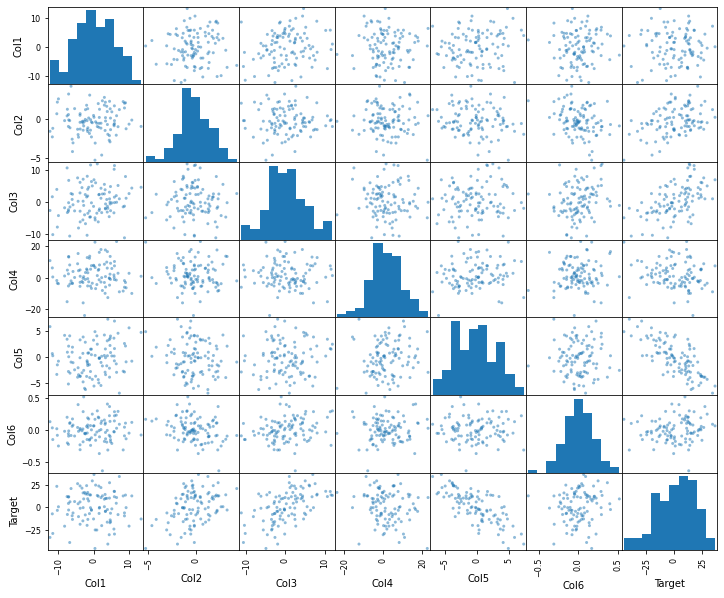

In [3]:
from pandas.plotting import scatter_matrix
attributes = raw_df.columns.values
scatter_matrix(raw_df[attributes], figsize=(12, 10))

             Col1        Col2        Col3        Col4        Col5        Col6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    -0.076288   -0.181381    0.339573    1.772602   -0.168269    0.009754   
std      5.560089    1.737693    4.982072    8.163906    3.184054    0.183237   
min    -12.398240   -5.280250  -11.235910  -23.820240   -6.865330   -0.634440   
25%     -3.880408   -1.222918   -2.833323   -3.383100   -2.731047   -0.099910   
50%     -0.009940   -0.278235   -0.072670    0.711860   -0.120520    0.002385   
75%      4.065705    1.083133    3.855920    6.704855    2.173942    0.119822   
max     13.374540    4.301200   11.946500   22.880080    7.351290    0.523280   

           Target  
count  100.000000  
mean     0.744579  
std     17.132932  
min    -45.017100  
25%     -9.455507  
50%      0.415680  
75%     12.878975  
max     36.216980  


<AxesSubplot:>

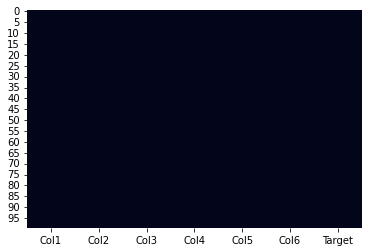

In [4]:
# Check information and number of nulls
print(raw_df.describe())
sns.heatmap(raw_df.isnull(), cbar=False)

In [5]:
corr_matrix = raw_df.corr()
corr_matrix["Target"].sort_values(ascending=False)

Target    1.000000
Col3      0.540408
Col2      0.387723
Col6      0.124176
Col1      0.027329
Col4     -0.183417
Col5     -0.748136
Name: Target, dtype: float64

In [6]:
# Divide our data
X = raw_df.iloc[:,:-1]
y = raw_df.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)


In [7]:
# Try simple linear regression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
linear_regression.score(X_test, y_test)

0.9983374856765338

In [8]:
# Lets do some K-cross validations
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_regression, X_train, y_train)
print(scores)
print(np.mean(scores))

[0.99656285 0.99639713 0.99527522 0.99401968 0.99773968]
0.9959989129007617


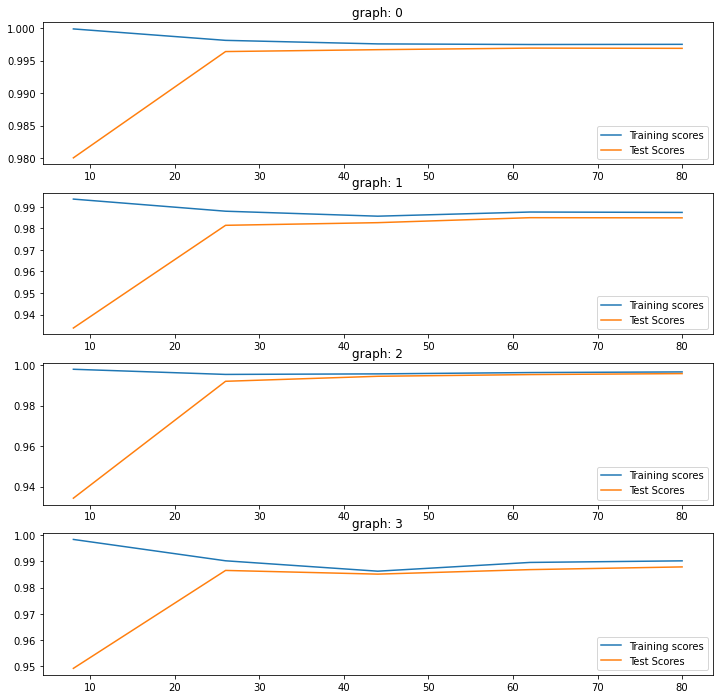

In [9]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(models, X,y, verbose= False):
    fig = plt.figure(figsize=(12,12))
    for (idx,model) in enumerate(models):
        train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(estimator=model,
                                                                            X=X,
                                                                            y=y,
                                                                            cv=None,
                                                                            return_times=True, 
                                                                            shuffle = True, 
                                                                            random_state = 45)    
        if verbose == True:
            print(f'train_sizes:{train_sizes}')
            print(f'train_scores:{train_scores}')
            print(f'test_scores:{test_scores}')
        
        ax = fig.add_subplot(len(models),1, idx+1)
        ax.plot(train_sizes,np.mean(train_scores,axis=1), label="Training scores")
        ax.plot(train_sizes,np.mean(test_scores,axis=1), label="Test Scores")
        ax.legend()
        plt.title(f'graph: {idx}')
    return models
        
# Consider 3 models
lin_regression = LinearRegression()
lasso = Lasso()
ridge = Ridge()
sgd = SGDRegressor()

models = plot_learning_curves([lin_regression, lasso, ridge, sgd], X,y)

## As Alpha gets bigger, the less feature it uses, but also notice that the training scores perform badly.
## Looks like you need to allow the model to use more features (small alpha ~1, 0.01)

[ 0.          0.          0.66953896 -0.         -1.08756877  0.        ]
[ 0.          0.          1.55613658 -0.00572191 -3.25489595  0.        ]
[ 0.03708732  2.45953859  1.9329546  -0.05784743 -3.96039296  0.        ]
[ 0.          2.96457076  1.97157565 -0.07083671 -3.97148176  9.06964358]


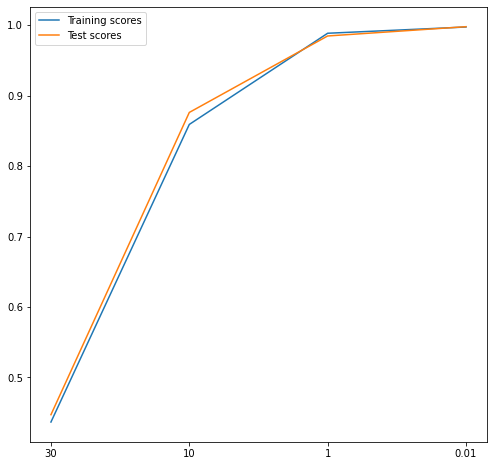

In [10]:
# Col3 y Col5 are the only features that may affect the outcome, lets try lasso

fig1 = plt.figure(figsize=(18,8))

lasso_models = {}
training_scores = []
test_scores = []
lasso_coeff={}
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
for alpha in [30,10,1,.01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso 
    lasso_coeff[alpha] = lasso.coef_
    print(lasso.coef_)    
    #ax2 = fig1.add_subplot(1,2,2)
    #ax2.plot(lasso_coeff[alpha],"o", label=f'alpha= {alpha}')


ax1 = fig1.add_subplot(1,2,1)
ax1.plot(training_scores, label="Training scores")
ax1.plot(test_scores, label="Test scores")
plt.xticks(range(4),[30,10,1,.01])
ax1.legend(loc="best")

    


[ 0.01976365  1.89702598  1.91539583 -0.09471886 -3.57857704  0.15064789]
[ 0.00954156  2.59531308  2.00819788 -0.07260726 -3.96355311  1.5544456 ]
[-3.36960313e-03  2.85610189e+00  2.00028715e+00 -7.93242638e-02
 -3.98031466e+00  6.35958990e+00]
[-0.01123328  2.97527005  1.98960893 -0.08515781 -3.96852845  9.48959589]
[-0.01133957  2.97684023  1.98945883 -0.08523839 -3.96834755  9.53211015]


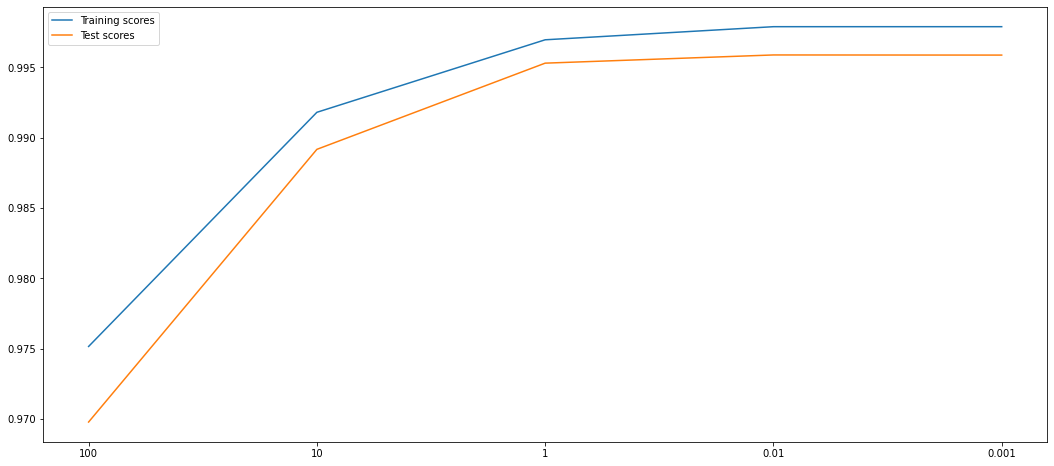

In [11]:
# Try now with ridge
# L2 regularization will not delete unimportant features
# You will notices the coefficients are not drawn to zero as drastically as L1

fig2 = plt.figure(figsize=(18,8))

ridge_models = {}
training_scores = []
test_scores = []
ridge_coeff={}
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
for alpha in [100,10,1,.01, 0.001]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge
    ridge_coeff[alpha] = ridge.coef_
    print(ridge.coef_)    
    #ax2 = fig1.add_subplot(1,2,2)
    #ax2.plot(lasso_coeff[alpha],"o", label=f'alpha= {alpha}')


ax2 = fig2.add_subplot(1,1,1)
ax2.plot(training_scores, label="Training scores")
ax2.plot(test_scores, label="Test scores")
plt.xticks(range(5),[100,10,1,.01,0.001])
ax2.legend(loc="best")

    


In [12]:
lasso = Lasso()
lasso.fit(X, y)
lasso.coef_

array([ 0.        ,  2.35793224,  2.00441646, -0.05511954, -3.92808318,
        0.        ])

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Target', ylabel='Density'>

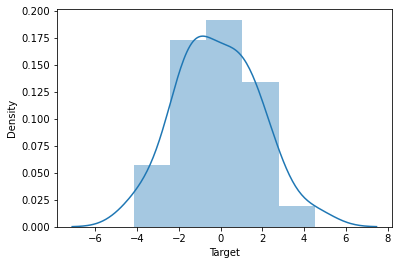

In [19]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.coef_
y_pred = lasso.predict(X_test)
sns.distplot(y_test-y_pred)

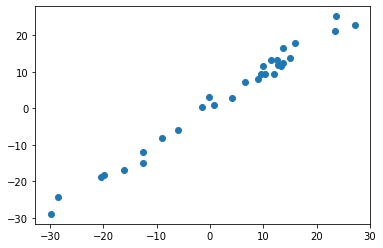

In [20]:
plt.scatter(y_test, y_pred)